In [1]:
import gaps_online as go

In [14]:
import gaps_online.db as db
from glob import glob
import re
from collections import defaultdict
from tqdm.notebook import tqdm
import numpy as np

In [3]:
data = go.cxx_api.get_tofpackets("/data1/nextcloud/cra_data/data/2023_nevis/tof/108/Run108_1.2024_0", filter=go.cxx_api.PacketType.TofEvent)

[2024-02-29 23:53:52.623] [info] [io.cxx:92] Read out 790 packets from bytestream!


In [5]:
tofevents = []
fixed_path = "/data1/nextcloud/cra_data/data/2023_nevis/tof/121/Run121"

#data = "/data1/nextcloud/cra_data/data/2023_nevis/tof/121/Run121_1.2024_03_05-09_47_33.tof.gaps"
files = glob(f'{fixed_path}_*.tof.gaps')
print(len(files))



for fname in files[:20]:
    data = go.tof.get_tofpackets(fname, filter=go.cxx_api.PacketType.TofEvent)
    evts = [go.cxx_api.TofEvent.from_tofpacket(k) for k in data]
    tofevents.extend(evts)
 

980
[2024-03-15 17:57:58.738] [info] [io.cxx:92] Read out 1920 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:57:59] -- Read out 1950 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:57:59] -- Read out 1900 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:57:59] -- Read out 1965 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:57:59] -- Read out 1990 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:57:59] -- Read out 1900 packets from bytestream!
[error] [events.cxx - from_bytestream:828] [2024-03-15 17:57:59] -- Size matches neither 20 nor 25 LTBs!
[error] [events.cxx - from_bytestream:214] [2024-03-15 17:57:59] -- Tail signature incorrect! Got tail 50963
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:58:00] -- Read out 1249 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:58:00] -- Read out 1939 packets from bytestream

In [4]:
data = [go.cxx_api.TofEvent.from_tofpacket(k) for k in data]

In [5]:
event = data[100]
print(len(data))

790


In [8]:
pattern = re.compile(r'/calibration/20240305/RB(\d+)_\d{4}_\d{2}_\d{2}-\d{2}_\d{2}_\d{2}\.cali\.tof\.gaps')
calibrations = glob('/data1/nextcloud/cra_data/data/2023_nevis/tof/calibration/20240305/*.cali.tof.gaps')

calib = {}

# Iterate over each file path
for fname in calibrations:
    #print("Processing file:", fname)
    # Search for the pattern in the file path
    match = pattern.search(fname)
    if match:
        print("Match found:", match.group())
        # Extract RB ID from the match
        rbid = match.group(1)
        calib[rbid] = go.cxx_api.RBCalibration.from_califile(fname)
    else:
        print("No match found for:", fname)

Match found: /calibration/20240305/RB39_2024_03_05-21_26_52.cali.tof.gaps
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:58:43] -- Read out 1 packets from bytestream!
Match found: /calibration/20240305/RB03_2024_03_05-21_26_51.cali.tof.gaps
Match found:[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:58:43] -- Read out 1 packets from bytestream!
 /calibration/20240305/RB35_2024_03_05-21_26_56.cali.tof.gaps
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:58:44] -- Read out 1 packets from bytestream!
Match found: /calibration/20240305/RB18_2024_03_05-21_26_57.cali.tof.gaps
Match found: /calibration/20240305/RB09_2024_03_05-21_26_53.cali.tof.gaps
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:58:44] -- Read out 1 packets from bytestream!
Match found: /calibration/20240305/RB33_2024_03_05-21_26_52.cali.tof.gaps
Match found: /calibration/20240305/RB06_2024_03_05-21_26_58.cali.tof.gaps
[info] [io.cxx - get_tofpackets:92] [2024-03-15 17:58:44] -- Read out 1 packets from bytestrea

In [9]:
#calib = go.cxx_api.RBCalibration.from_califile("/data/stoessl/RB15_2024_02_06-17_57_19.cali.tof.gaps/)

In [6]:
calib = go.cxx_api.RBCalibration.from_califile("/data1/nextcloud/cra_data/data/2023_nevis/tof/calibration/RB")

[error] [io.cxx - get_tofpackets:101] [2024-02-29 23:53:52] -- Can't open /data1/nextcloud/cra_data/data/2023_nevis/tof/calibration/RB since it does not exist!


RuntimeError: Abort program due to a log_fatal(..) statement in the gaps code!

In [8]:
#tcal_nts = go.cxx_api.RBCalibration.from_califile("/data/stoessl/nts/calibrations/)
event.get_rbevent??

Docstring:
get_rbevent(self: gaps_tof.TofEvent, rb_id: int) -> gaps_tof.RBEvent

Return a the event for this specif RB id
Type:      method

20
23
18
24
30
8
0.4973153


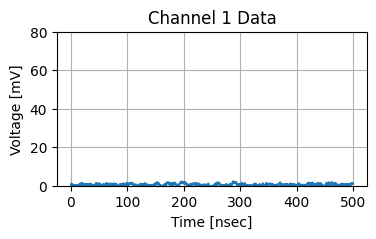

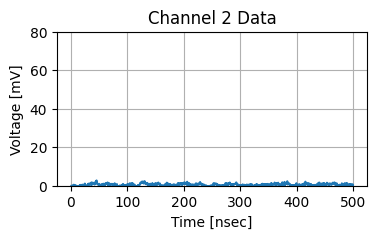

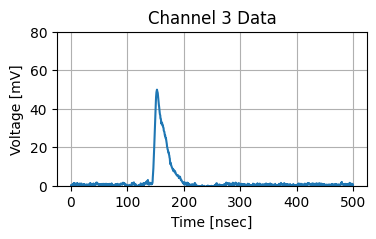

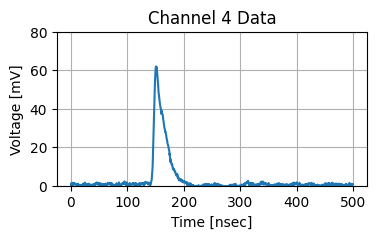

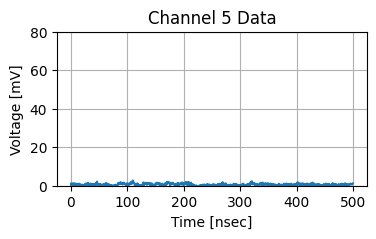

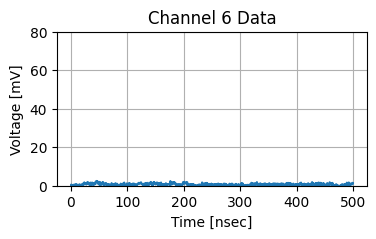

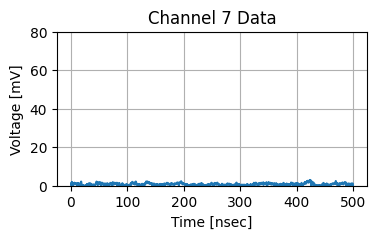

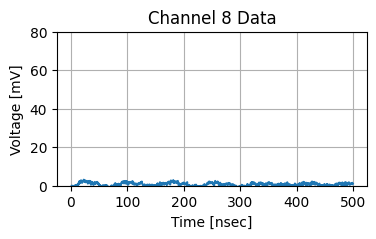

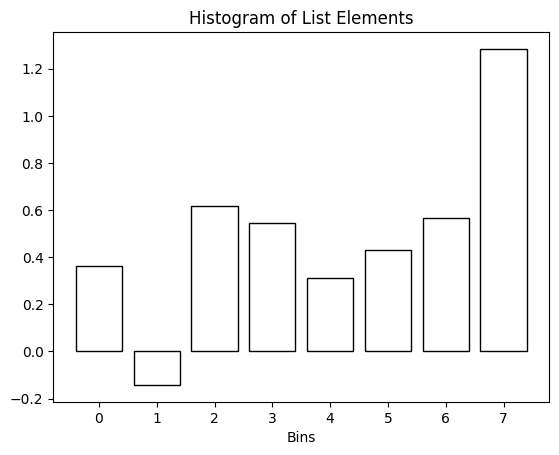

15


In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

for rb_id in event.get_rbids():
    print(str(rb_id))
    if rb_id != 30:
        continue
    rb_event = event.get_rbevent(rb_id)

    voltage = calib.voltages(rb_event, spike_cleaning = True)
    time = calib.nanoseconds(rb_event)
    #v = rb_event.calc_baseline(rb_event)
    #print (rb_event)
    #print(type(rb_id))
    #print(type(rb_event))

    cali_time = []
    cali_voltage = []
    volt_baseline = []
    channels = rb_event.header.get_channels()
    for ch in channels:
        if ch == 8:
            continue
        adc = rb_event.get_channel_adc(ch+1)
        
        baseline_slice = voltage[ch][10:51]
        baseline = np.mean(baseline_slice)
        volt_baseline.append(baseline)
        cali_time.append(time[ch])
        cali_voltage.append(voltage[ch])
        plt.figure(figsize = (4,2))  # Create a new figure for each channel
        plt.plot(time[ch], voltage[ch])
        plt.title(f"Channel {ch+1} Data")
        plt.xlabel("Time [nsec]")
        plt.ylabel("Voltage [mV]")
        plt.ylim(0, 80)
       
        plt.grid(True)


    print(len(volt_baseline))
    print(np.mean(volt_baseline))

    plt.figure()
    #hist, bins = np.histogram(volt_baseline, bins=8)
    plt.bar(range(len(volt_baseline)), volt_baseline, fill = False)  # Plotting the bars
    plt.xlabel('Bins')
    #plt.ylabel('Frequency')
    plt.title('Histogram of List Elements')
    #plt.xticks(range(len(hist)), [f'[{bins[i]:.2f}, {bins[i+1]:.2f})' for i in range(len(hist))])  # Labels for x-axis
    plt.show()
    #print(len(time[0]))
    #rb_event.plot()
    #print(channels)
    #print(rb_event)
    

In [8]:
import re
from glob import glob
import numpy as np
import math
from collections import defaultdict

#in this section, the dictionary containing the baseline voltages is compiled. The dictionary is structured as { 'rbid': '01', 'channel': 2, baseline_rms : 0.3647567 }

def get_third_entries(volts, first_value, second_value):
    third_entries = []
    for inner_list in volts:
        if len(inner_list) >= 2:
            if inner_list[0] == str(first_value) and inner_list[1] == str(second_value):
                third_entry = inner_list[2]
                if not math.isnan(third_entry):
                    third_entries.append(third_entry)
    return third_entries

data = go.cxx_api.get_tofpackets("/data1/nextcloud/cra_data/data/2023_nevis/tof/108/Run108_1.2024_02_21-10_28_18.tof.gaps", filter=go.cxx_api.PacketType.TofEvent)
data = [go.cxx_api.TofEvent.from_tofpacket(k) for k in data]

pattern = re.compile(r'/calibration/RB(\d+)_\d{4}_\d{2}_\d{2}-\d{2}_\d{2}_\d{2}\.cali\.tof\.gaps')
calibrations = glob('/data1/nextcloud/cra_data/data/2023_nevis/tof/calibration/*.cali.tof.gaps')
calib = dict ()

print("Number of files found:", len(calibrations))

calib = {}

# Iterate over each file path
for fname in calibrations:
    #print("Processing file:", fname)
    # Search for the pattern in the file path
    match = pattern.search(fname)
    if match:
        #print("Match found:", match.group())
        # Extract RB ID from the match
        rbid = match.group(1)
        calib[rbid] = fname
    else:
        print("No match found for:", fname)



baselines = []
my_dict = {}

baseline_rms_dict = defaultdict(list)
for x in range(790):
    event = data[x]
    rbids = event.get_rbids()
    
    for rb_id in rbids:
        event_id = event.get_rbevent(rb_id)
        str_id = f'{rb_id:02d}'
        cali_file = calib[str_id]
        calibration = go.cxx_api.RBCalibration.from_califile(cali_file)
        voltages = calibration.voltages(event_id)

        baseline_v_all_channels = []
        for channel in range(8):
            slice = np.array(voltages[channel][10:50])
            mean_square = np.mean(slice**2)
            rms = np.sqrt(mean_square)
            
            # baseline_v = slice.mean()
            # baseline_v_all_channels.append(baseline_v)
            #print('RB: ' + str_id + ' channel: '+ str(channel) +' baseline: ' + str(baseline_v))
            
            info = {'rbid' : str_id, 'channel' : channel, 'baseline_rms' : rms}
            
            baselines.append(info)
            
         
for element in baselines:
    r = element['rbid']
    channel1 = element['channel']
    baseline_rms = element['baseline_rms']

    baseline_rms_dict[(r, channel1)].append(baseline_rms)


for (r, channel1), baseline_rms_list in baseline_rms_dict.items(): #populate dictionary based on the elements of the baseline_rms_dict. baseline_rms_dict uses the library defaultdict to create a list in baselime_rms_dict for each r,channel1 pair
    mean_baseline_rms = np.mean(baseline_rms_list)   # here the mean is calculated of the baseline_rms_list for each dict containing the list of values for each r,channel1 pair.  
    if r in my_dict:
        my_dict[r][channel1] = mean_baseline_rms

    else:
        my_dict[r]={channel1: mean_baseline_rms}



    

[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:23] -- Read out 790 packets from bytestream!
Number of files found: 40
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:23] -- Read out 1 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:24] -- Read out 1 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:24] -- Read out 1 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:25] -- Read out 1 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:25] -- Read out 1 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:26] -- Read out 1 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:26] -- Read out 1 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:26] -- Read out 1 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-02-29 23:57:26] -- Read out 1 packets from bytestream!
[i

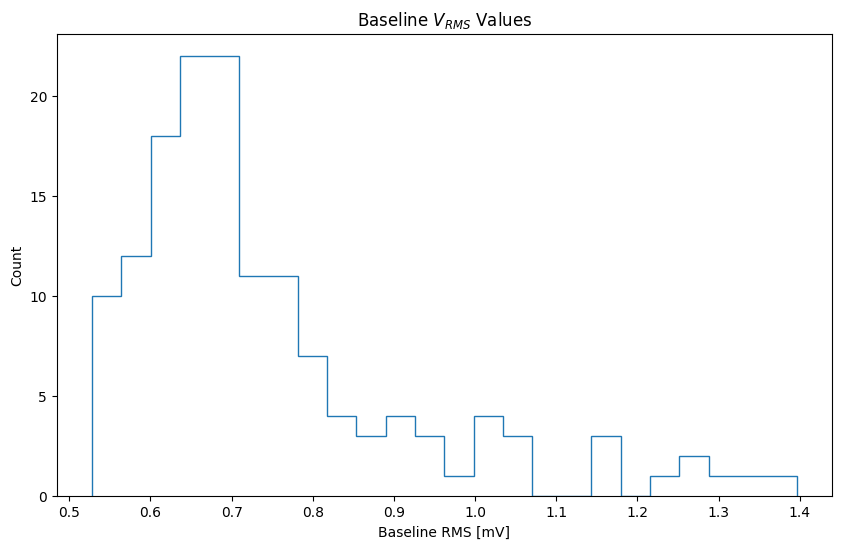

In [9]:
import matplotlib.pyplot as plt
# in this section a histrogram is created plotting the majority of baseline rms voltages

# Access all the baseline_rms values
baseline_rms_values = [baseline_rms for sub_dict in my_dict.values() for baseline_rms in sub_dict.values()]

filtered_values = np.where(np.array(baseline_rms_values) < 250)[0]

# Create a histogram with filtered values
plt.figure(figsize = (10, 6))
plt.hist(np.array(baseline_rms_values)[filtered_values], histtype = 'step', bins = 24)

plt.xlabel('Baseline RMS [mV]')
plt.ylabel('Count')
plt.title(r'Baseline $V_{RMS}$ Values')
#plt.xticks(np.arange(0.5, 1.5, 0.1))
plt.show()

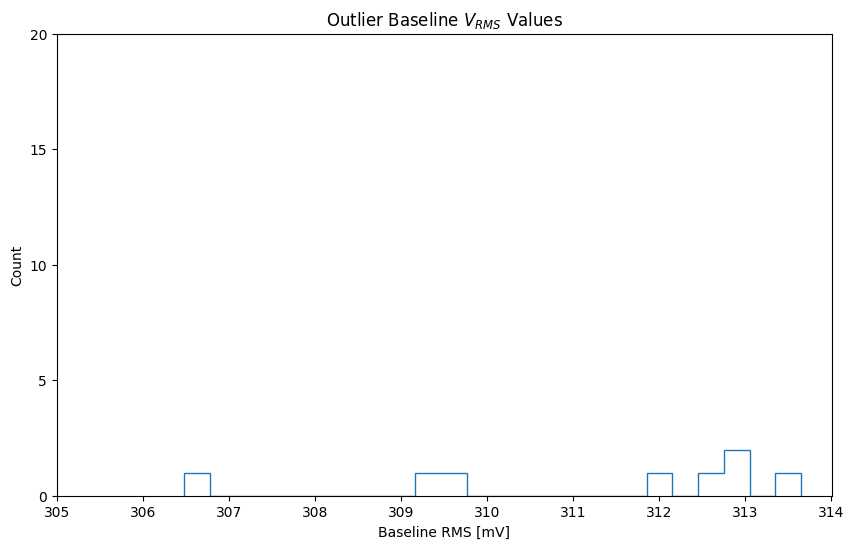

In [10]:
# in this section, a histogram is created plotting the outliers of the baseline rms voltages. this is seperated from the previous plot due to binning restrictions. 

outliers = np.where(np.array(baseline_rms_values) > 250)[0]

# Create a histogram with filtered values
plt.figure(figsize = (10, 6))
plt.hist(np.array(baseline_rms_values)[outliers], histtype = 'step', bins = 24)

plt.xlabel('Baseline RMS [mV]')
plt.ylabel('Count')
plt.title(r'Outlier Baseline $V_{RMS}$ Values')
plt.xticks(np.arange(305, 315, 1))
plt.yticks(np.arange(0,25,5))
plt.show()

In [23]:
baseline_rms_list = list(baseline_rms_dict)
print(baseline_rms_list[1])

15


In [17]:
baseline_v_dict = defaultdict(list)
baselines = []
outlier_baselines = []
baseline_outlier_dict = defaultdict(list)

high_baseline_wvs = []
n_waveforms = 0
my_dict = {}

for i in tqdm(range(36000)):
    rbids = tofevents[i].get_rbids()
    rbevents = [tofevents[i].get_rbevent(k) for k in rbids]

    
    for event_id in rbevents:
        if event_id.header.rb_id == 0: continue
        
        #event_id = tofevents[i].get_rbevent(rb)
        str_id = f'{event_id.header.rb_id:02d}'
        if len(str_id) > 2: continue
        calibration = calib[str_id]
        
        voltages = calibration.voltages(event_id)

        for channel in event_id.header.get_channels():
            if channel == 8: continue
            slice = np.array(voltages[channel][10:50])
            mean_bl = np.mean(slice)
            info = {'rbid' : str_id, 'channel' : channel, 'baseline_V' : mean_bl}
            
            if mean_bl <= -200:
            
                #event_id.plot(calib = calib[str_id])
                #print(slice)
                
                # print(event_id.get_channel_adc(channel+1))
                # plt.show()
                # raise 
                outlier_baselines.append(info)#seperating outlier 300mV baselines from others, for ease of presenting data
                if n_waveforms <= 10:
                    high_baseline_wvs.append(event_id)
                    n_waveforms +=1
                
            else: 
                baselines.append(info) #just remove if/else if you want to plot them all at same time (and change loop below)
            

for element in baselines:
    r = element['rbid']
    channel1 = element['channel']
    baseline_V = element['baseline_V']

    baseline_v_dict[(r, channel1)].append(baseline_V)

for element in outlier_baselines: #delete outlier_baselines list etc and delete this for if you want to just print all at once
    r = element['rbid']
    channel1 = element['channel']
    baseline_V = element['baseline_V']

    baseline_outlier_dict[(r, channel1)].append(baseline_V)

for (r, channel1), baseline_rms_list in baseline_v_dict.items(): #populate dictionary based on the elements of the baseline_rms_dict. baseline_rms_dict uses the library defaultdict to create a list in baselime_rms_dict for each r,channel1 pair
    mean_baseline_rms = np.mean(baseline_rms_list)   # here the mean is calculated of the baseline_rms_list for each dict containing the list of values for each r,channel1 pair.  
    if r in my_dict:
        my_dict[r][channel1] = mean_baseline_rms

    else:
        my_dict[r]={channel1: mean_baseline_rms}



  0%|          | 0/36000 [00:00<?, ?it/s]

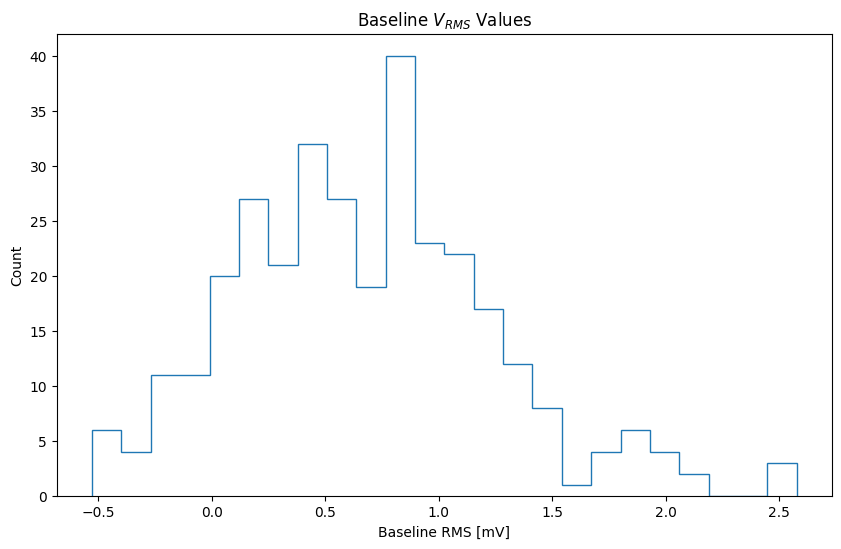

In [19]:
import matplotlib.pyplot as plt
# in this section a histrogram is created plotting the majority of baseline rms voltages

# Access all the baseline_rms values
baseline_rms_values = [baseline_rms for sub_dict in my_dict.values() for baseline_rms in sub_dict.values()]

filtered_values = np.where(np.array(baseline_rms_values) < 250)[0]

# Create a histogram with filtered values
plt.figure(figsize = (10, 6))
plt.hist(np.array(baseline_rms_values)[filtered_values], histtype = 'step', bins = 24)

plt.xlabel('Baseline RMS [mV]')
plt.ylabel('Count')
plt.title(r'Baseline $V_{RMS}$ Values')
#plt.xticks(np.arange(0.5, 1.5, 0.1))
plt.show()